# Author : Shihab

In [19]:
# Import necessary libraries
import os
import csv
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [20]:
# Set the image size and number of classes
IMG_SIZE = 150
NUM_CLASSES = 2


In [21]:
# Define the paths to the dataset folders
TRAIN_DIR = 'animal_images/training'
TEST_DIR = 'animal_images/test'

In [32]:

# Load the training dataset

def load_dataset():
    images = []
    labels = []
    for folder in os.listdir(TRAIN_DIR):
        folder_path = os.path.join(TRAIN_DIR, folder)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(folder)
    return np.array(images), np.array(labels)


# Split the dataset into training and validation sets
X, y = load_dataset()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                  random_state=42)

# Preprocess the data
X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.
y_train = to_categorical(y_train, NUM_CLASSES)
y_val = to_categorical(y_val, NUM_CLASSES)


In [68]:
# Define the CNN model architecture
model = Sequential()
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


ValueError: Input 0 of layer "max_pooling2d_8" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 2)

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'], run_eagerly=True)

In [77]:
history = model.fit(X_train, y_train, epochs=10,
                    batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
307/307 [==============================] - 433s 1s/step - loss: 0.6499 - accuracy: 0.6208 - val_loss: 0.6024 - val_accuracy: 0.6790
Epoch 2/10
307/307 [==============================] - 1090s 4s/step - loss: 0.5374 - accuracy: 0.7320 - val_loss: 0.5094 - val_accuracy: 0.7454
Epoch 3/10
307/307 [==============================] - 428s 1s/step - loss: 0.4546 - accuracy: 0.7839 - val_loss: 0.4523 - val_accuracy: 0.7857
Epoch 4/10
307/307 [==============================] - 448s 1s/step - loss: 0.3888 - accuracy: 0.8210 - val_loss: 0.4254 - val_accuracy: 0.8057
Epoch 5/10
307/307 [==============================] - 470s 2s/step - loss: 0.3179 - accuracy: 0.8559 - val_loss: 0.4047 - val_accuracy: 0.8216
Epoch 6/10
307/307 [==============================] - 470s 2s/step - loss: 0.2558 - accuracy: 0.8889 - val_loss: 0.4385 - val_accuracy: 0.8213
Epoch 7/10
307/307 [==============================] - 465s 2s/step - loss: 0.1924 - accuracy: 0.9200 - val_loss: 0.4510 - val_accuracy: 0.823

In [78]:
# save the model
model.save_weights('model/cnn_weights5.h5')

In [33]:
history = model.fit(X_train, y_train, epochs=1,
                    batch_size=64, validation_data=(X_val, y_val))

301/301 [==============================] - 417s 1s/step - loss: 0.1299 - accuracy: 0.9598 - val_loss: 0.2412 - val_accuracy: 0.9179


In [35]:
# load the model
model.load_weights('model/cnn_weights6.h5')
# fit the model
history = model.fit(X_train, y_train, epochs=1,
                    batch_size=64, validation_data=(X_val, y_val))

301/301 [==============================] - 411s 1s/step - loss: 0.0674 - accuracy: 0.9772 - val_loss: 0.2849 - val_accuracy: 0.9173


In [ ]:
"""
#load the model and train it again
model.load_weights('model/cnn_weights6.h5')
history = model.fit(X_train, y_train, epochs=1,
                    batch_size=32, validation_data=(X_val, y_val)) 
                    """

In [8]:
model.load_weights('model/cnn_weights5.h5')


In [12]:
# Load the test dataset and test and then print the a
test_images = []
test_filenames = []
for img_name in os.listdir(TEST_DIR):
    img_path = os.path.join(TEST_DIR, img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    test_images.append(img)
    test_filenames.append(img_name)

# Preprocess the test data
X_test = np.array(test_images)

# Make predictions on the test data
predictions = (model.predict(X_test) > 0.5).astype("int32")

188/188 [==============================] - 60s 320ms/step


Test accuracy:  1.0


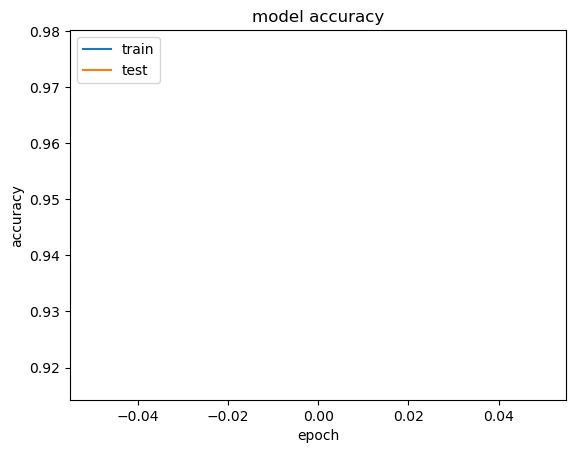

In [38]:
# Print the accuracy of the model on the test data
import matplotlib.pyplot as plt
print('Test accuracy: ', np.sum(predictions == 0) / len(predictions))

# plot the accuracy and loss of the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
# Save the predictions to a CSV file
with open('sample_submission.csv', mode='w', newline='') as submission_file:
    writer = csv.writer(submission_file, delimiter=',')
    writer.writerow(['image_name', 'label'])
    for i, filename in enumerate(test_filenames):
        class_id = np.argmax(predictions[i])
        writer.writerow([filename, class_id])

In [81]:
""" # compare the name of each image in submission files and change the label in sample_submission_images.csv with the label in sample_submission.csv

submission1 = pd.read_csv('sample_submission_images.csv')
submission2 = pd.read_csv('sample_submission.csv')

for i, row in submission1.iterrows():
    image_name = row['image_name']
    label3 = row['label']

    # Look for the image name in df2
    match = submission2.loc[submission2['image_name'] == image_name]

    # If there's a match, update the label in df3
    if not match.empty:
        label2 = match.iloc[0]['label']
        if label2 != label3:
            submission1.at[i, 'label'] = label2

# Write the updated df3 to a new CSV file
submission1.to_csv('sample_submission_images.csv', index=False) """


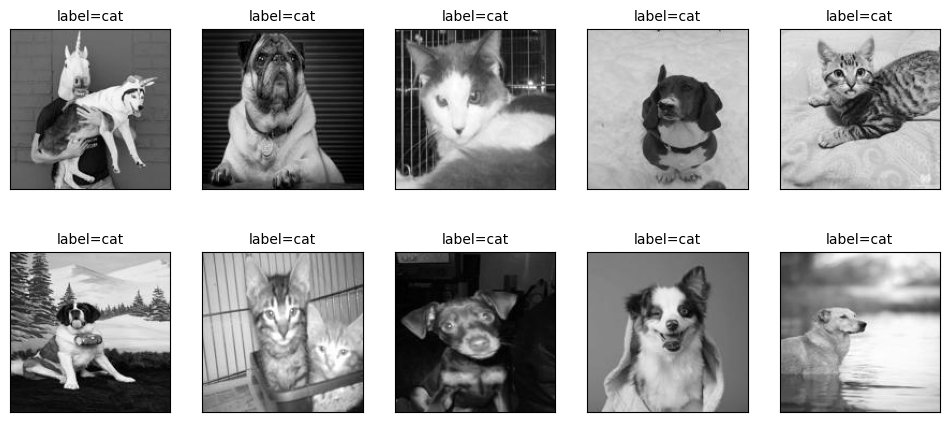

In [63]:
import matplotlib.pyplot as plt
import random
def show_images(images, labels, predictions, start_id, num=10):
    plt.gcf().set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[start_id])
        # show images and their labels if 0 is dog and 1 is ca
        if str(labels[start_id]) == '[1. 0.]':
            title = 'label=dog'
        else:
            title = 'label=cat'
        if len(predictions) > 0:
            title += ', predict=' + str(predictions[start_id])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        start_id += 1
    plt.show()

# Show the images and their labels
show_images(X_test, predictions, [], 0, 10)